### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Importing the data

In [2]:
df = pd.read_csv("OnlineRetail.csv", sep = ",", encoding = "ISO-8859-1", header= 0)

In [3]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Cleaning

In [5]:
df_null = round(100*(df.isnull().sum())/len(df), 2)

In [6]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# drop the missing customer_id

df = df.dropna()
df.shape

(406829, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Data Preparation

#### Amount

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### Frequency

In [11]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()

In [12]:
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Merge amount and frequency

In [13]:
rfm = pd.merge(rfm_m, rfm_f, on="CustomerID", how="inner")
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Receny

In [14]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00


In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [16]:
# to get the recent date - to know the last transaction date in the data
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# compute the difference in max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
rfm_r = df.groupby('CustomerID')['Diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
# extract number of days only

rfm_r['Diff'] = rfm_r['Diff'].dt.days

In [20]:
rfm_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [21]:
rfm = pd.merge(rfm, rfm_r, on='CustomerID', how = 'inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Receny']
rfm.head()

,CustomerID,Amount,Frequency,Receny
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [22]:
rfm.shape

(4372, 4)

### Rescaling the Attributes

In [23]:
rfm_df = rfm[['Amount', 'Frequency', 'Receny']]


scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4372, 3)

In [24]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


# K_MEANS Algorithm

### Elbow Method

In [25]:
from sklearn.cluster import KMeans

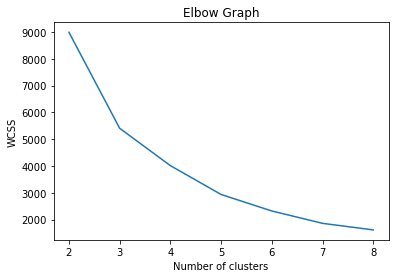

In [26]:
wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(rfm_df_scaled)
    
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range_n_clusters, wcss)
plt.title('Elbow Graph')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
#plt.xticks()
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=5)

In [28]:
kmeans.labels_

array([1, 0, 0, ..., 0, 3, 0], dtype=int32)

In [29]:
kmeans.cluster_centers_

array([[-0.07271207, -0.07913199, -0.48462807],
       [-0.17425251, -0.28127391,  1.5635526 ],
       [ 7.65089359, 25.04225176, -0.89373323],
       [ 1.09300196,  1.76246354, -0.79096634],
       [23.14383293,  3.95941676, -0.82425702]])

In [30]:
cluster_data = rfm_df.copy()
cluster_data['cluster_pred'] = kmeans.fit_predict(rfm_df_scaled)

In [31]:
cluster_data.head(20)

,Amount,Frequency,Receny,cluster_pred
0,0.00,2,325,1
1,4310.00,182,1,4
2,1797.24,31,74,4
3,1757.55,73,18,4
4,334.40,17,309,1
5,1545.41,95,35,4
6,89.00,4,203,1
7,1079.40,58,231,1
8,459.40,13,213,1
9,2811.43,59,22,4


In [32]:
cluster_data.loc[cluster_data['cluster_pred']==0]

,Amount,Frequency,Receny,cluster_pred
66,7877.20,300,25,0
71,13375.87,420,0,0
86,8933.52,355,10,0
100,18740.92,531,1,0
101,6229.48,391,30,0
...,...,...,...,...
4245,5595.77,1284,10,0
4249,1826.21,364,7,0
4324,6315.23,299,1,0
4326,5361.02,286,2,0


## Agglomerative Clustering

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

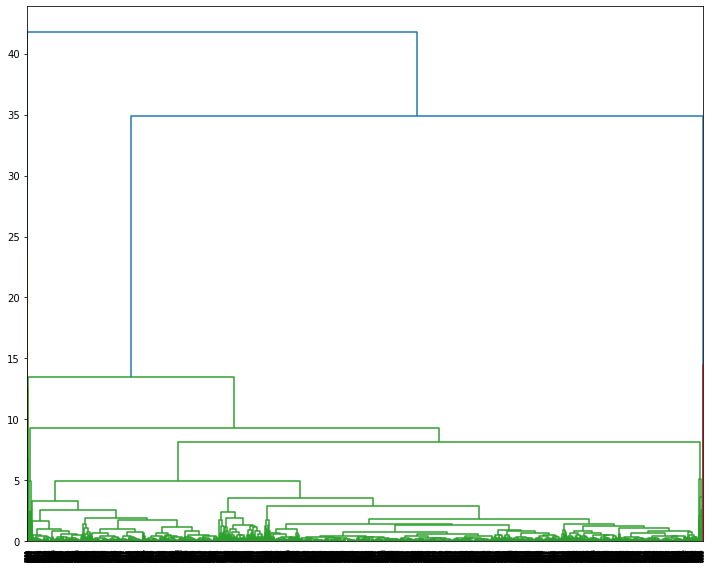

In [47]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = dendrogram(linkage(rfm_df_scaled, method = 'complete'))
plt.tight_layout()
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

ag_cluster = AgglomerativeClustering(n_clusters = 3)

In [36]:
ag_cluster.fit(rfm_df_scaled)

AgglomerativeClustering(n_clusters=3)

In [37]:
cluster_data = rfm_df.copy()

In [38]:
cluster_data['cluster_pred'] = ag_cluster.fit_predict(rfm_df_scaled)

In [39]:
cluster_data.head()

,Amount,Frequency,Receny,cluster_pred
0,0.00,2,325,2
1,4310.00,182,1,1
2,1797.24,31,74,1
3,1757.55,73,18,1
4,334.40,17,309,2
